# ***Домашнее задание №1 по курсу "Введение в ML"***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

---

## 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.

1.1 С циклом

In [ ]:
def task11(X):
  total = 1
  diag_size = min(X.shape)
  for i in range(diag_size):
    if X[i][i] != 0:
      total = total * X[i][i]
  return total

1.2 Со списочным выражением

In [ ]:
def task12(X):
  nonzero_diag = [X[i][i] for i in range(min(X.shape)) if X[i][i] != 0]
  return np.prod(nonzero_diag)

1.3 Без циклов, с использованием функций numpy

In [ ]:
def task13(X):
  return np.prod(np.diag(X)[np.diag(X) != 0])

1.4 Без циклов, сохраняем диагональные элементы

In [ ]:
def task14(X):
  diag = np.diag(X)
  return np.prod(diag[diag != 0])

1.5 Без циклов, с функцией nonzero

In [ ]:
def task15(X):
  diag = np.diag(X)
  return np.prod(diag[np.nonzero(diag)])

Проверка

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) # ответ 3
print(task11(X), task12(X), task13(X), task14(X), task15(X))

3 3 3 3 3


In [ ]:
size = 10000
X = np.random.rand(size, size).astype(np.longdouble)
print(task11(X), task12(X), task13(X), task14(X), task15(X), sep = '\n')

5.466045115275605849e-4343
5.466045115275605849e-4343
5.466045115275605849e-4343
5.466045115275605849e-4343
5.466045115275605849e-4343


Замеры времени

In [ ]:
size = 10
X = np.random.rand(size, size).astype(np.longdouble)
%timeit task11(X)
%timeit task12(X)
%timeit task13(X)
%timeit task14(X)
%timeit task15(X)

23.3 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
31.8 µs ± 8.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
24.8 µs ± 6.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
18.3 µs ± 5.1 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.2 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
size = 100
X = np.random.rand(size, size).astype(np.longdouble)
%timeit task11(X)
%timeit task12(X)
%timeit task13(X)
%timeit task14(X)
%timeit task15(X)

105 µs ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
102 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
30.9 µs ± 7.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
17.3 µs ± 4.34 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17.6 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
size = 1000
X = np.random.rand(size, size).astype(np.longdouble)
%timeit task11(X)
%timeit task12(X)
%timeit task13(X)
%timeit task14(X)
%timeit task15(X)

853 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.03 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
34.7 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
41.9 µs ± 6.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
36.3 µs ± 979 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
size = 10000
X = np.random.rand(size, size).astype(np.longdouble)
%timeit task11(X)
%timeit task12(X)
%timeit task13(X)
%timeit task14(X)
%timeit task15(X)

11.4 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
10 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
266 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
190 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
278 µs ± 5.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Анализ

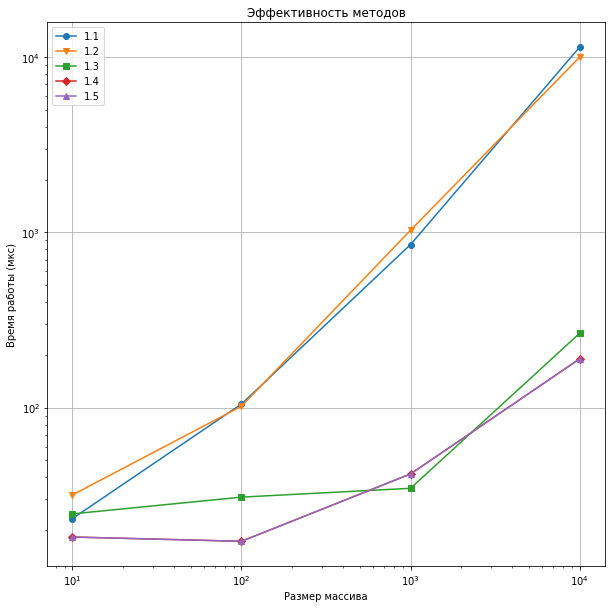

In [ ]:
sizes = [10, 100, 1000, 10_000]
times1 = [23.3, 105, 853, 11_400]
times2 = [31.8, 102, 1_030, 10_000]
times3 = [24.8, 30.9, 34.7, 266]
times4 = [18.3, 17.3, 41.9, 190]
times5 = [16.2, 17.6, 36.3, 278]
plt.figure(figsize = (10,10))
plt.title('Эффективность методов')
plt.xlabel('Размер массива')
plt.ylabel('Время работы (мкс)')
plt.plot(sizes, times1, '-o', label = '1.1')
plt.plot(sizes, times2, '-v', label = '1.2')
plt.plot(sizes, times3, '-s', label = '1.3')
plt.plot(sizes, times4, '-D', label = '1.4')
plt.plot(sizes, times4, '-^', label = '1.5')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.grid()

Можно видеть, что реализация с циклом и со списочным выражением при большом размере массива работает сильно медленней, чем реализации без циклов и с использованем функций numpy. При малом размере массива различие по времени не такое существенное, хотя реализации без циклов все равно имеют преимущество. Реализации 1.4 и 1.5 (X!=0 и функция np.nonzero) по времени оказались практически одинаковыми (графики накладываются)

---

## 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

2.1 С циклом

In [ ]:
def task21(X, i, j):
  answer = np.zeros(len(i), dtype = X.dtype)
  for k in range(len(i)):
    answer[k] = X[i[k]][j[k]]
  return answer

2.2 Списочное выражение

In [ ]:
def task22(X, i, j):
  return np.array([X[i[k]][j[k]] for k in range(len(i))])

2.3 Без циклов

In [ ]:
def task23(X, i, j):
  return X[i, j]

Проверка

In [ ]:
X = np.array([[1, 2, 3], [2, 5, 6], [6, 4, 9]]) # ответ [3 2 5 9 6]
i = np.array([0, 0, 1, 2, 2])
j = np.array([2, 1, 1, 2, 0])
print(task21(X, i, j), task22(X, i, j), task23(X, i, j), sep = '\n')

[3 2 5 9 6]
[3 2 5 9 6]
[3 2 5 9 6]


In [ ]:
N = 10000
X = np.random.rand(N, N).astype(np.longdouble)
i = np.random.randint(N, size = N)
j = np.random.randint(N, size = N)
print(np.sum(task21(X, i, j)), np.sum(task22(X, i, j)), np.sum(task23(X, i, j)), sep = '\n')

4996.47574766895641
4996.47574766895641
4996.47574766895641


Замеры времени

In [ ]:
N = 10
X = np.random.rand(N, N)
i = np.random.randint(N, size = N)
j = np.random.randint(N, size = N)
%timeit task21(X, i, j)
%timeit task22(X, i, j)
%timeit task23(X, i, j)

9.44 µs ± 4.68 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.8 µs ± 6.93 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.92 µs ± 121 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 100
X = np.random.rand(N, N)
i = np.random.randint(N, size = N)
j = np.random.randint(N, size = N)
%timeit task21(X, i, j)
%timeit task22(X, i, j)
%timeit task23(X, i, j)

54.9 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
54.4 µs ± 984 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.4 µs ± 735 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 1000
X = np.random.rand(N, N)
i = np.random.randint(N, size = N)
j = np.random.randint(N, size = N)
%timeit task21(X, i, j)
%timeit task22(X, i, j)
%timeit task23(X, i, j)

854 µs ± 330 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
561 µs ± 7.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.37 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 10000
X = np.random.rand(N, N)
i = np.random.randint(N, size = N)
j = np.random.randint(N, size = N)
%timeit task21(X, i, j)
%timeit task22(X, i, j)
%timeit task23(X, i, j)

6.6 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.19 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
95.1 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Анализ

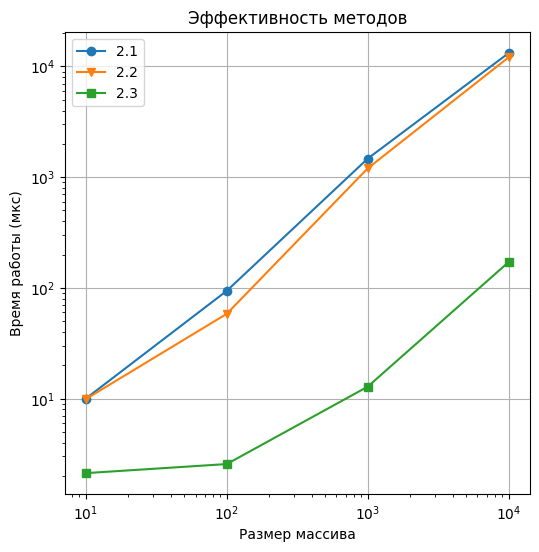

In [ ]:
sizes = [10, 100, 1000, 10_000]
times1 = [10, 94, 1_470, 13_200]
times2 = [9.9, 58.3, 1_200, 12_100]
times3 = [2.12, 2.56, 12.8, 171]
plt.figure(figsize = (6,6))
plt.title('Эффективность методов')
plt.xlabel('Размер массива')
plt.ylabel('Время работы (мкс)')
plt.plot(sizes, times1, '-o', label = '2.1')
plt.plot(sizes, times2, '-v', label = '2.2')
plt.plot(sizes, times3, '-s', label = '2.3')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.grid()

На графике видно, что полностью векторизованная реализация алгоритма работает на 1-2 порядка быстрее других двух реализаций при всех рассмотренных размерах данных. Реализации с циклом и со списочным выражением работают примерно за одинаковое время с небольшим преимуществом списочного выражения. Можно также отметить, что график реализации без циклов похож на параболу (т.е. скорость увеличения времени растет), в отличие от двух других графиков, которые выглядят линейными

---

## 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.

3.1 С циклом

In [ ]:
def task31(x, y):
  x = x.tolist()
  y = y.tolist()
  answer = True
  for _ in range(len(x)):
    elem = x[0]
    if x.count(elem) != y.count(elem):
      answer = False
      break
    else:
      x.remove(elem)
      y.remove(elem)
  if len(y) != 0:
    answer = False
  return answer

3.2 Без циклов, функция bincount

In [ ]:
from numpy.lib.function_base import bincount
def task32(x, y):
  return np.array_equal(bincount(x), bincount(y))

3.3 Без циклов, сортировка

In [ ]:
def task33(x, y):
  return np.array_equal(np.sort(x), np.sort(y))

Проверка

In [ ]:
x = np.array([1, 2, 2, 4]) # ответ True
y = np.array([4, 2, 2, 1])
print(task31(x, y), task32(x, y), task33(x, y))

True True True


Замеры времени

In [ ]:
N = 10
x = np.arange(N)
y = np.arange(N-1, -1, -1)
%timeit task31(x, y)
%timeit task32(x, y)
%timeit task33(x, y)

8.78 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.32 µs ± 202 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.3 µs ± 3.73 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 100
x = np.arange(N)
y = np.arange(N-1, -1, -1)
%timeit task31(x, y)
%timeit task32(x, y)
%timeit task33(x, y)

361 µs ± 117 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.7 µs ± 5.51 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13.9 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 1000
x = np.arange(N)
y = np.arange(N-1, -1, -1)
%timeit task31(x, y)
%timeit task32(x, y)
%timeit task33(x, y)

39.9 ms ± 9.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.9 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
27.1 µs ± 936 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
N = 10000
x = np.arange(N)
y = np.arange(N-1, -1, -1)
%timeit task31(x, y)
%timeit task32(x, y)
%timeit task33(x, y)

3.51 s ± 1.16 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
56.8 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
221 µs ± 49.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Анализ

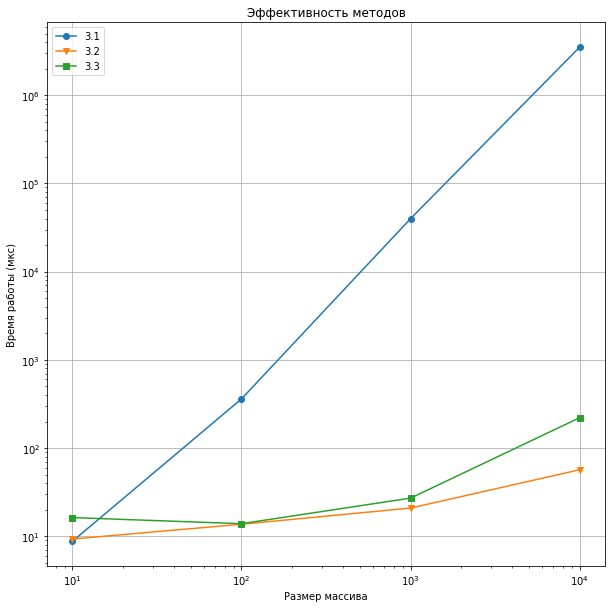

In [ ]:
sizes = [10, 100, 1000, 10_000]
times1 = [8.78, 361, 39_900, 3_510_000]
times2 = [9.32, 13.7, 20.9, 56.8]
times3 = [16.3, 13.9, 27.1, 221]
plt.figure(figsize = (10,10))
plt.title('Эффективность методов')
plt.xlabel('Размер массива')
plt.ylabel('Время работы (мкс)')
plt.plot(sizes, times1, '-o', label = '3.1')
plt.plot(sizes, times2, '-v', label = '3.2')
plt.plot(sizes, times3, '-s', label = '3.3')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.grid()

Видно, что при малом размере массива реализация с циклом и без использования numpy оказалась немного быстрее двух других реализаций. Однако при увеличении размера массива, время реализации с циклом оказывается существенно больше по сравнению с реализациями с помощью пакета numpy. При рассмотренных размерах времена отличаются на 1-4 порядка, поэтому использовать реализацию с циклом при большом объеме данных неприемлемо. Можно отметить, что график реализации без numpy линейный. На рассмотренных размерах реализация с sort работает немного дольше чем реализация с bincount, причем разница во времени имеет тенденцию расти с увеличением N

---
## 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

4.1 С циклом

In [ ]:
def task41(x):
  answer = min(x)
  for i in range(1, len(x)):
    if x[i-1] == 0 and x[i] > answer:
      answer = x[i]
  return answer

4.2 Без цикла

In [ ]:
def task42(x):
  mask = np.hstack((np.array(False), (x==0)[:-1]))
  return x[mask].max()

4.3 Без цикла, max не из numpy

In [ ]:
def task43(x):
  mask = np.hstack((np.array(False), (x==0)[:-1]))
  return max(x[mask])

Проверка

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) # ответ 5
print(task41(x), task42(x), task43(x))

5 5 5


In [ ]:
N = 5
x = np.zeros(N)
x[1::2] = np.random.rand(N//2)
print(*x)
print(task41(x), task42(x), task43(x), sep = '\n')

0.0 0.6925397914526197 0.0 0.6005878567626987 0.0
0.6925397914526197
0.6925397914526197
0.6925397914526197


Замеры времени

In [ ]:
N = 10
x = np.zeros(N)
x[1::2] = np.random.randint(0, 100, size = N//2)
%timeit task41(x)
%timeit task42(x)
%timeit task43(x)

8 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
23.7 µs ± 6.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
35.5 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
N = 100
x = np.zeros(N)
x[1::2] = np.random.randint(0, 100, size = N//2)
%timeit task41(x)
%timeit task42(x)
%timeit task43(x)

50.9 µs ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
20.1 µs ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
29.6 µs ± 7.27 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 1000
x = np.zeros(N)
x[1::2] = np.random.randint(0, 100, size = N//2)
%timeit task41(x)
%timeit task42(x)
%timeit task43(x)

778 µs ± 426 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
26 µs ± 3.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
92.1 µs ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
N = 10000
x = np.zeros(N)
x[1::2] = np.random.randint(0, 100, size = N//2)
%timeit task41(x)
%timeit task42(x)
%timeit task43(x)

4.83 ms ± 54.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
81 µs ± 5.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
500 µs ± 176 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Анализ

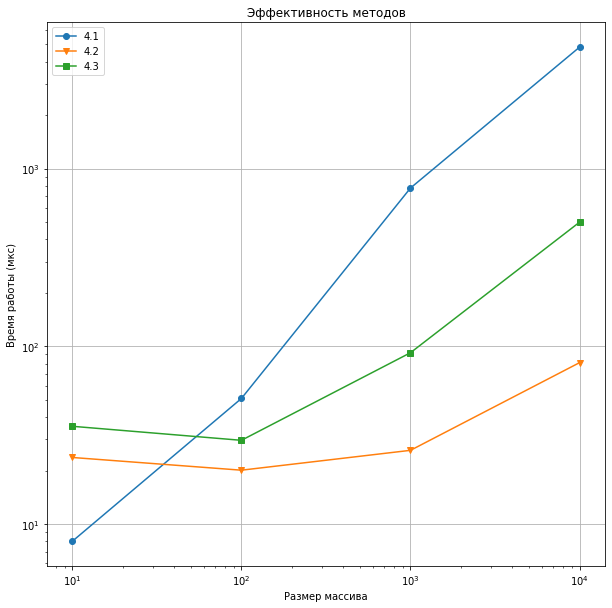

In [ ]:
sizes = [10, 100, 1000, 10_000]
times1 = [8, 50.9, 778, 4_830]
times2 = [23.7, 20.1, 26, 81]
times3 = [35.5, 29.6, 92.1, 500]
plt.figure(figsize = (10,10))
plt.title('Эффективность методов')
plt.xlabel('Размер массива')
plt.ylabel('Время работы (мкс)')
plt.plot(sizes, times1, '-o', label = '4.1')
plt.plot(sizes, times2, '-v', label = '4.2')
plt.plot(sizes, times3, '-s', label = '4.3')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.grid()

При размере массива N = 10 время работы реализации с циклом оказалось существенно меньше реализаций с использованием numpy. Начиная с N = 100 время работы реализации с циклом оказалось существенно больше (1-2 порядка). При этом при сравнении варианта 4.2 и 4.3 (np.max и max) можно видеть, что для всех размеров данных использование функции из numpy привело к существенному сокращению времени (до 1 порядка). График 4.1 линейный

---
## 5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

5.1 С циклами

In [ ]:
def task51(pic):
  coeffs = np.array([0.299, 0.587, 0.114])
  height = pic.shape[0]
  width = pic.shape[1]
  res = np.zeros((height, width))
  for i in range(height):
    for j in range(width):
      res[i][j] = np.dot(coeffs, pic[i][j])
  return res

5.2 С одним циклом

In [ ]:
def task52(pic):
  coeffs = np.array([0.299, 0.587, 0.114])
  height = pic.shape[0]
  width = pic.shape[1]
  res = np.zeros((height, width))
  for i in range(height):
    res[i][:] = np.dot(pic[i], coeffs)
  return res

5.3 Без циклов

In [ ]:
def task53(pic):
  coeffs = np.array([0.299, 0.587, 0.114])
  return np.dot(pic, coeffs)

Проверка

In [ ]:
import imageio
pic = imageio.imread('https://blogcinema.es/wp-content/uploads/2022/02/cuanto-vive-un-puercoespin.png')
res = task53(pic).astype(np.uint8)
imageio.imwrite('grey.png', res)

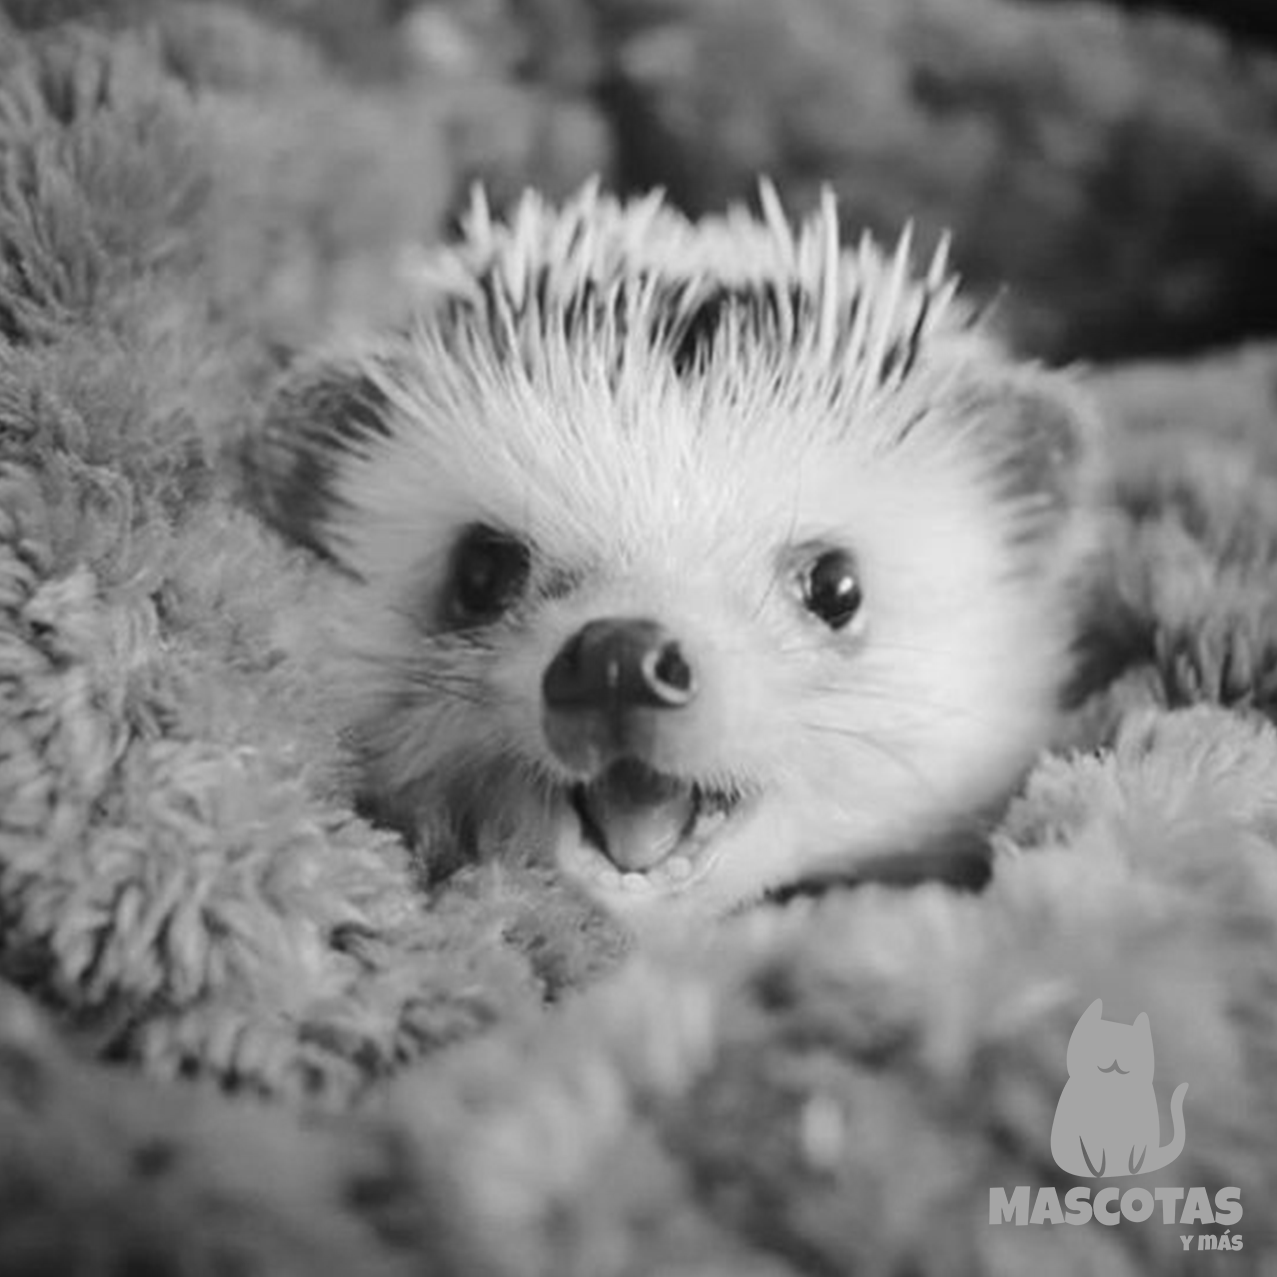

In [ ]:
from IPython.display import Image
display(Image(url='https://blogcinema.es/wp-content/uploads/2022/02/cuanto-vive-un-puercoespin.png', width = 250))
display(Image(filename='/content/grey.png', width = 250))

Замеры времени

In [ ]:
N = 10
x = np.random.randint(0, 256, size = (N, N, 3))
%timeit task51(x)
%timeit task52(x)
%timeit task53(x)

356 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
57.3 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
9.8 µs ± 4.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 100
x = np.random.randint(0, 256, size = (N, N, 3))
%timeit task51(x)
%timeit task52(x)
%timeit task53(x)

36 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
461 µs ± 9.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
730 µs ± 211 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
N = 1000
x = np.random.randint(0, 256, size = (N, N, 3))
%timeit task51(x)
%timeit task52(x)
%timeit task53(x)

4.76 s ± 1.07 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.6 ms ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
48.7 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
N = 10000
x = np.random.randint(0, 256, size = (N, N, 3))
%timeit task52(x)
%timeit task53(x)

1.76 s ± 508 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.64 s ± 1.06 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Анализ

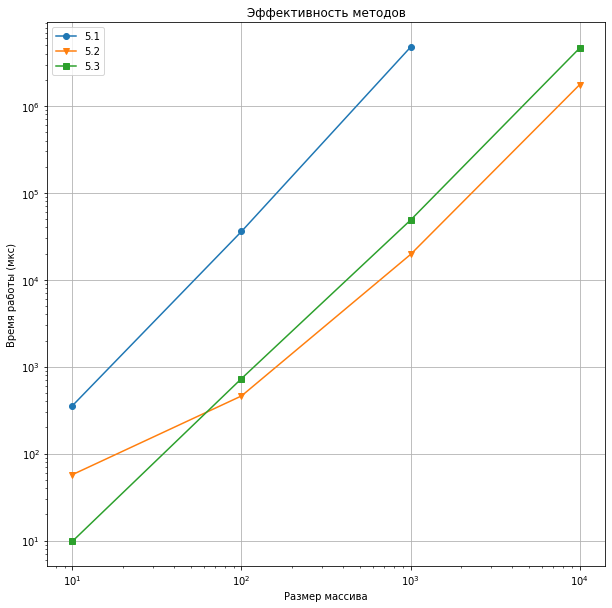

In [ ]:
sizes = [10, 100, 1000, 10_000]
times1 = [356, 36_000, 4_760_000]
times2 = [57.3, 461, 19_600, 1_760_000]
times3 = [9.8, 730, 48_700, 4_640_000]
plt.figure(figsize = (10,10))
plt.title('Эффективность методов')
plt.xlabel('Размер массива')
plt.ylabel('Время работы (мкс)')
plt.plot(sizes[:-1], times1, '-o', label = '5.1')
plt.plot(sizes, times2, '-v', label = '5.2')
plt.plot(sizes, times3, '-s', label = '5.3')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.grid()

Реализация в двумя циклами показала худшее время. При любом N времена для реализаций с двумя циклами и без них отличаются на 1-2 порядка. Реализация с одним циклом и без работают относительно похожее время. При больших N преимущество оказалось у реализации с одним циклом

---
## 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.

6.1 С циклом

In [ ]:
def task61(x):
  nums = [x[0]]
  freq = [1]
  for i in range(1, len(x)):
    if x[i] != nums[-1]:
      nums.append(x[i])
      freq.append(1)
    else:
      freq[-1] += 1
  return np.array(nums), np.array(freq)

6.2 Списочное выражение

In [ ]:
def task62(x):
  indices = [i-1 for i in range(1, len(x)) if x[i] != x[i-1]] + [len(x)-1]
  nums = x[indices]
  freq = [indices[0]+1] + [indices[i]-indices[i-1] for i in range(1, len(indices))]
  return np.array(nums), np.array(freq)

6.3 Без цикла

In [ ]:
def task63(x):
  mask = np.diff(np.hstack((x,np.array(x[-1]+1)))) != 0
  nums = x[mask]
  indices = np.where(mask)[0]
  freq = np.hstack((np.array(indices[0]+1), np.diff(indices)))
  return nums, freq

Проверка

In [ ]:
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
print(task61(x), task62(x), task63(x), sep = '\n')

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))
(array([2, 3, 5, 2]), array([3, 3, 1, 2]))
(array([2, 3, 5, 2]), array([3, 3, 1, 2]))


In [ ]:
N = 10
x = np.random.randint(0, 2, size = N)
print(x, task61(x), task62(x), task63(x), sep = '\n')

[1 0 0 1 1 0 1 1 1 0]
(array([1, 0, 1, 0, 1, 0]), array([1, 2, 2, 1, 3, 1]))
(array([1, 0, 1, 0, 1, 0]), array([1, 2, 2, 1, 3, 1]))
(array([1, 0, 1, 0, 1, 0]), array([1, 2, 2, 1, 3, 1]))


Замеры времени

In [ ]:
N = 10
x = np.random.randint(0, 100, size = N)
%timeit task61(x)
%timeit task62(x)
%timeit task63(x)

8.76 µs ± 2.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.5 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
46.7 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
N = 100
x = np.random.randint(0, 100, size = N)
%timeit task61(x)
%timeit task62(x)
%timeit task63(x)

52 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
129 µs ± 51.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
39.4 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
N = 1000
x = np.random.randint(0, 100, size = N)
%timeit task61(x)
%timeit task62(x)
%timeit task63(x)

484 µs ± 5.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
853 µs ± 262 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
42.8 µs ± 643 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
N = 10000
x = np.random.randint(0, 100, size = N)
%timeit task61(x)
%timeit task62(x)
%timeit task63(x)

5.87 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.2 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
128 µs ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Анализ

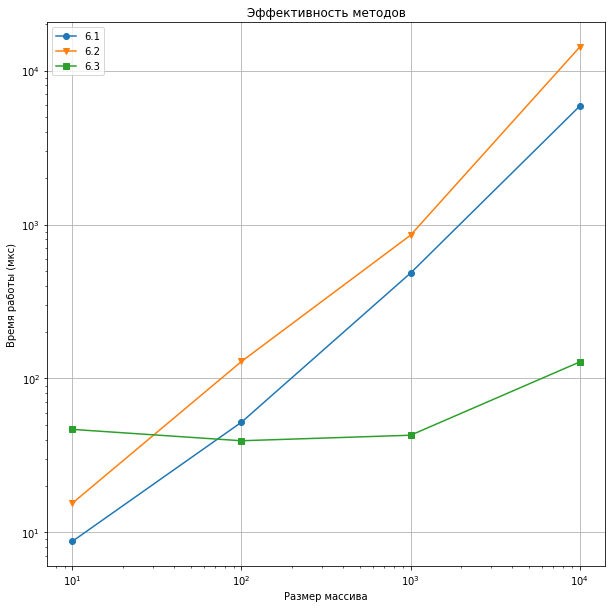

In [ ]:
sizes = [10, 100, 1000, 10_000]
times1 = [8.76, 52, 484, 5_870]
times2 = [15.5, 129, 853, 14_200]
times3 = [46.7, 39.4, 42.8, 128]
plt.figure(figsize = (10,10))
plt.title('Эффективность методов')
plt.xlabel('Размер массива')
plt.ylabel('Время работы (мкс)')
plt.plot(sizes, times1, '-o', label = '6.1')
plt.plot(sizes, times2, '-v', label = '6.2')
plt.plot(sizes, times3, '-s', label = '6.3')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.grid()

Графики реализаций со списком и списочным выражением имеют линейный вид, при больших N работают намного дольше версии без циклов. При N = 10 наоборот, версия с numpy работает дольше других. Время работы версии без циклов для N = 10, 100, 1000 примерно одинаково, что может говорить об эффективной реализации функций в пакете numpy, в том числе векторизации

---
## 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

7.1 С циклами

In [ ]:
def task71(X, Y):
  width = X.shape[0]
  height = Y.shape[0]
  answer = np.zeros((width, height))
  for i in range(width):
    for j in range(height):
      answer[i][j] = np.sqrt(np.dot(X[i] - Y[j], X[i] - Y[j]))
  return answer

7.2 Без циклов

In [ ]:
def task72(X, Y):
  width = X.shape[0]
  height = Y.shape[0]
  x = np.repeat(X, height, axis = 0)
  y = np.tile(Y, (width, 1))
  return np.linalg.norm(x - y, axis = 1).reshape(width, height)

7.3 С одним циклом

In [ ]:
def task73(X, Y):
  width = X.shape[0]
  height = Y.shape[0]
  answer = np.zeros((width, height))
  for i in range(width):
    answer[i][:] = np.sqrt(np.sum((X[i, np.newaxis] - Y)**2, axis = 1))
  return answer

Проверка

In [ ]:
from scipy.spatial.distance import cdist
X = np.array([[0, 1, 0],[0, 0, 0],[0, 0, 3]])
Y = np.array([[0, 0, 2],[0, 2, 2],[2, 2, 2]])
print(cdist(X,Y), task71(X, Y), task72(X, Y), task73(X, Y), sep = '\n\n')

[[2.23606798 2.23606798 3.        ]
 [2.         2.82842712 3.46410162]
 [1.         2.23606798 3.        ]]

[[2.23606798 2.23606798 3.        ]
 [2.         2.82842712 3.46410162]
 [1.         2.23606798 3.        ]]

[[2.23606798 2.23606798 3.        ]
 [2.         2.82842712 3.46410162]
 [1.         2.23606798 3.        ]]

[[2.23606798 2.23606798 3.        ]
 [2.         2.82842712 3.46410162]
 [1.         2.23606798 3.        ]]


Замеры времени

In [ ]:
N = 5
D = 2
X = np.random.rand(N, D)
Y = np.random.rand(N, D)
%timeit task71(X, Y)
%timeit task72(X, Y)
%timeit task73(X, Y)
%timeit cdist(X, Y)

181 µs ± 29.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
40.8 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.9 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.2 µs ± 849 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 25
D = 4
X = np.random.rand(N, D)
Y = np.random.rand(N, D)
%timeit task71(X, Y)
%timeit task72(X, Y)
%timeit task73(X, Y)
%timeit cdist(X, Y)

4.74 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
50.6 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
352 µs ± 6.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
10 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
N = 125
D = 8
X = np.random.rand(N, D)
Y = np.random.rand(N, D)
%timeit task71(X, Y)
%timeit task72(X, Y)
%timeit task73(X, Y)
%timeit cdist(X, Y)

113 ms ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
897 µs ± 8.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.16 ms ± 67 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
117 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
N = 625
D = 16
X = np.random.rand(N, D)
Y = np.random.rand(N, D)
%timeit task71(X, Y)
%timeit task72(X, Y)
%timeit task73(X, Y)
%timeit cdist(X, Y)

2.93 s ± 869 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
79.7 ms ± 448 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
39.1 ms ± 5.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.68 ms ± 654 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
N = 625*5
D = 16*2
X = np.random.rand(N, D)
Y = np.random.rand(N, D)
%timeit task72(X, Y)
%timeit task73(X, Y)
%timeit cdist(X, Y)

3.64 s ± 94.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.01 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
226 ms ± 9.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


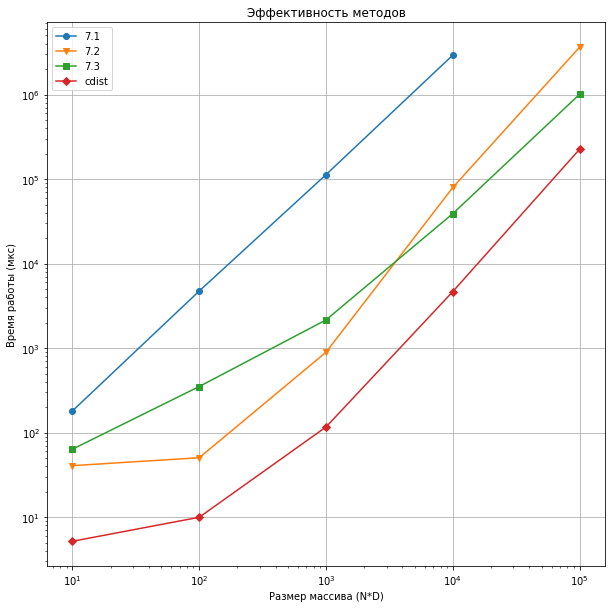

In [ ]:
sizes = [10, 100, 1000, 10_000, 100_000]
times1 = [181, 4_740, 113_000, 2_930_000]
times2 = [40.8, 50.6, 897, 79_700, 3_640_000]
times3 = [63.9, 352, 2_160, 39_100, 1_010_000]
times4 = [5.2, 10, 117, 4_680, 226_000]
plt.figure(figsize = (10,10))
plt.title('Эффективность методов')
plt.xlabel('Размер массива (N*D)')
plt.ylabel('Время работы (мкс)')
plt.plot(sizes[:-1], times1, '-o', label = '7.1')
plt.plot(sizes, times2, '-v', label = '7.2')
plt.plot(sizes, times3, '-s', label = '7.3')
plt.plot(sizes, times4, '-D', label = 'cdist')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.grid()

Дольше всего работает версия с двумя циклами, график линейный. Быстрее всего сработала функция cdist из scipy. Для N*D = 10, 100, 1000 версия без циклов работает быстрее версии с одним циклом.

# Выводы

Для каждого из заданий были написаны несколько реализации различной эффективности, сравнены скорости работы версий на разных объемах данных. Подводя итоги, можно сделать вывод что при больших N версии с циклами работают на несколько порядков дольше чем версии, использующие пакет numpy. При этом специализированные для конкретной задачи функции (например, cdist из пакета scipy) позволяют еще больше сократить время работы программы. Векторизация, более эффективная работа с кеш-памятью и т.д., используемые в пакете numpy, написанный на C, позволяют существенно сократить время расчета.